In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
import itertools
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
T = 'treatment'
target_feature = 'effect'

In [ ]:
path = "/content/drive/Shareddrives/Guy_Noam_Shared_Drive/Casual Inference/data_for_traffic_research.csv"
df = pd.read_csv(path)
df = df.sample(n=1000000)
# df_treated = df[df[T]==1]
# df_not_treated = df[df[T]==0]

# df_treated = df_treated.sample(n=250000)
# df_not_treated = df_not_treated.sample(n=250000)
# df = pd.concat([df_treated, df_not_treated], ignore_index=True)

In [ ]:
df.columns
# 'classification_1_key', 'classification_2_key', 'country_name'

Index(['site_creation_days_ago', 'site_upgraded_days_ago', 'treatment',
       'e_tool', 'a_tool', 'f_tool', 'c_tool', 'g_tool', 'effect',
       'classification_3', 'classification_1_key_1', 'classification_1_key_2',
       'classification_1_key_3', 'classification_1_key_4',
       'classification_1_key_5', 'classification_1_key_6',
       'classification_1_key_7', 'classification_1_key_8',
       'classification_1_key_9', 'classification_2_key_1',
       'classification_2_key_2', 'classification_2_key_3',
       'classification_2_key_4', 'classification_2_key_5',
       'classification_2_key_6', 'classification_2_key_7',
       'classification_2_key_8', 'classification_2_key_9',
       'classification_2_key_10', 'classification_2_key_11',
       'classification_2_key_12', 'classification_2_key_13',
       'classification_2_key_14', 'classification_2_key_15',
       'classification_2_key_16', 'classification_2_key_17',
       'country_name_Australia', 'country_name_Belgium', 'country_

In [ ]:
df = pd.get_dummies(df, columns=['classification_1_key', 'classification_2_key','country_name'])
df.drop("age_of_blog", axis=1, inplace=True)
df

,site_creation_days_ago,site_upgraded_days_ago,treatment,e_tool,a_tool,f_tool,c_tool,g_tool,effect,classification_3,...,country_name_Mexico,country_name_Netherlands,country_name_New Zealand,country_name_ROW,country_name_Russia,country_name_Spain,country_name_Switzerland,country_name_Turkey,country_name_United Kingdom,country_name_United States
921339,268,183,0,0,0,0,0,0,22,1,...,0,0,0,0,0,0,0,0,0,1
3150746,455,452,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2079088,497,493,0,0,0,1,1,0,46,0,...,0,0,0,0,0,0,0,0,0,1
905565,278,277,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2539324,214,214,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185841,66,23,1,0,0,1,0,0,119,0,...,0,0,0,0,0,0,0,0,0,0
1986161,317,317,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3215562,354,352,0,0,0,1,1,0,5,1,...,0,0,0,0,0,0,0,0,0,1
1665731,307,307,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['site_creation_days_ago', 'site_upgraded_days_ago', 'treatment',
       'e_tool', 'a_tool', 'f_tool', 'c_tool', 'g_tool', 'effect',
       'classification_3', 'classification_1_key_1', 'classification_1_key_2',
       'classification_1_key_3', 'classification_1_key_4',
       'classification_1_key_5', 'classification_1_key_6',
       'classification_1_key_7', 'classification_1_key_8',
       'classification_1_key_9', 'classification_2_key_1',
       'classification_2_key_2', 'classification_2_key_3',
       'classification_2_key_4', 'classification_2_key_5',
       'classification_2_key_6', 'classification_2_key_7',
       'classification_2_key_8', 'classification_2_key_9',
       'classification_2_key_10', 'classification_2_key_11',
       'classification_2_key_12', 'classification_2_key_13',
       'classification_2_key_14', 'classification_2_key_15',
       'classification_2_key_16', 'classification_2_key_17',
       'country_name_Australia', 'country_name_Belgium', 'country_

In [ ]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


(array([147., 295., 253., 210.,  83.]),
 array([0.   , 0.196, 0.392, 0.588, 0.784, 0.98 ]),
 <a list of 5 Patch objects>)

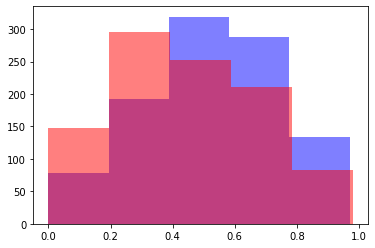

In [ ]:
df_1 = df[df[T] == 1].drop(["treatment", "effect"], axis=1)
df_0 =df[df[T] == 0].drop(["treatment", "effect"], axis=1)
df_prop = df.drop(["treatment", "effect"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_prop, df["treatment"], test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

x1 = [x for x,y in zip(X_test.values, y_test) if y==1]
x2 = [x for x,y in zip(X_test.values, y_test) if y==0]
e_t = rf.predict_proba(x1)[:, 1]
e_t0 = rf.predict_proba(x2)[:, 1]

pyplot.hist(e_t, bins=5, ls='dashed', lw=3, fc=(0, 0, 1, 0.5))
pyplot.hist(e_t0, bins=5, ls='dotted', lw=3, fc=(1, 0, 0, 0.5))

In [ ]:
rf.predict_proba(X_test)

array([[0.37, 0.63],
       [0.63, 0.37],
       [0.38, 0.62],
       ...,
       [0.37, 0.63],
       [0.55, 0.45],
       [0.34, 0.66]])

In [ ]:
for x in X_test.values:
  print(x)

In [ ]:
# T = df["blog_date"]
# T[T.notnull()] = 1
# T.fillna(0, inplace=True)
# df["T"] = T

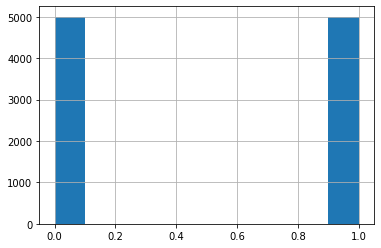

In [ ]:
df[T].hist()

Text(0.5, 1.0, 'number of sites with blogs')

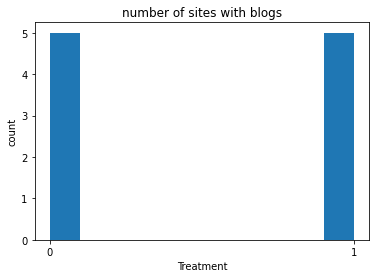

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

plt.hist(df[T], label=[0,1], density=True)
plt.xlabel("Treatment")
plt.ylabel("count")
plt.xticks([0,1])
plt.title("number of sites with blogs")

In [ ]:
ATE = {}

treated_outcome = np.mean(df[df[T] == 1]["effect"])
control_outcome = np.mean(df[df[T] == 0]["effect"])

naive_ATE = treated_outcome - control_outcome
ATE['naive'] = naive_ATE
print(naive_ATE)

80.70299999999999


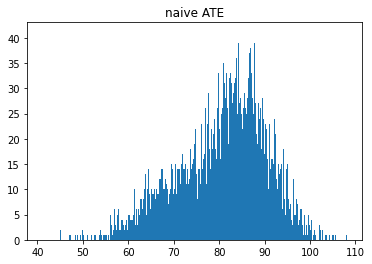

95.0 confidence interval 58.7 and 96.7


In [ ]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# load dataset
values = df.values
# configure bootstrap
n_iterations = 10000
n_size = 8000
# run bootstrap
stats = list()
for i in range(n_iterations):
  sample = df.sample(n=n_size)
  # prepare train and test sets
  treated_outcome = np.mean(sample[sample[T] == 1]["effect"])
  control_outcome = np.mean(sample[sample[T] == 0]["effect"])
  naive_ATE = treated_outcome - control_outcome
  stats.append(naive_ATE)
# plot scores
pyplot.title("naive ATE")
pyplot.hist(stats, bins=1000)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(stats, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

In [ ]:
# IPW estimated ATE

X, y, X_treated, y_treated, X_control, y_control, T_ = get_data(df, T)
n = len(X)

rf = RandomForestClassifier(max_depth=30, random_state=123)
rf.fit(X, T_)

e_t = rf.predict_proba(X_treated)[:, 1]
e_c = rf.predict_proba(X_control)[:, 1]

e_t, y_treated = clean(e_t, y_treated, 0)
e_c, y_control = clean(e_c, y_control, 1)

first = np.sum(y_treated / e_t) / n
second = np.sum(y_control / (1 - e_c)) / n

IPW_ATE = round(first - second , 4)

print("ATE:", IPW_ATE)
ATE['ipw'] = IPW_ATE

ATE: 52.6485


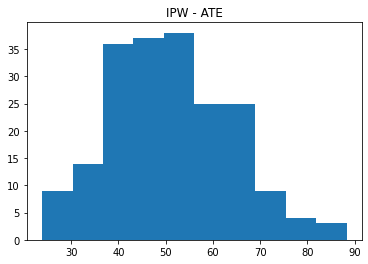

95.0 confidence interval 28.4 and 77.7


In [ ]:
n_iterations = 200
n_size = 5000
# run bootstrap
stats = list()
for i in range(n_iterations):
  # prepare train and test sets
  sample = df.sample(n=n_size)
  X, y, X_treated, y_treated, X_control, y_control, T_ = get_data(sample, T)
  n = len(X)
  rf = RandomForestClassifier(max_depth=30, random_state=123)
  rf.fit(X, T_)
  e_t = rf.predict_proba(X_treated)[:, 1]
  e_c = rf.predict_proba(X_control)[:, 1]
  e_t, y_treated = clean(e_t, y_treated, 0)
  e_c, y_control = clean(e_c, y_control, 1)
  first = np.sum(y_treated / e_t) / n
  second = np.sum(y_control / (1 - e_c)) / n
  IPW_ATE = round(first - second , 4)
  # fit model
  stats.append(IPW_ATE)
# plot scores
pyplot.title("IPW - ATE")
pyplot.hist(stats, bins=10)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(stats, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

In [ ]:
from sklearn.linear_model import LinearRegression

def propensity(X,y):
  clf = LinearRegression().fit(X, np.ravel(y.to_numpy()))
  prop = clf.predict(X)
  # print("mean ", np.mean(prop))
  # print("min ", np.min(prop))
  # print("max ", np.max(prop))

  return prop

In [ ]:
# # import numpy
# # from pandas import read_csv
# # from sklearn.utils import resample
# # from sklearn.tree import DecisionTreeClassifier
# # from sklearn.metrics import accuracy_score
# from matplotlib import pyplot

# load dataset
values = df.values
# configure bootstrap
n_iterations = 100
n_size = 5000
# run bootstrap
stats = list()
for i in range(n_iterations):
  sample = df.sample(n=n_size)
  X = sample.copy()

  X = X.drop(target_feature, axis=1)
  y = sample[target_feature]

  evaluate(X, y)

  dt = RandomForestClassifier(max_depth = 20, random_state=123)  
  dt.fit(X,y)

  X_treated = X.copy()
  X_treated[T] = 1
  y_1 = dt.predict(X_treated)
  X_control = X.copy()
  X_control[T] = 0
  y_0 = dt.predict(X_control)
  s_learner_ATE = round(np.mean(y_1 - y_0), 4)
  stats.append(s_learner_ATE)
# plot scores
pyplot.title("S-learner - ATE")
pyplot.hist(stats, bins=10)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(stats, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

In [ ]:
# S-Learner comparison - Decision Tree classifier

X = df.copy()

X = X.drop(target_feature, axis=1)
y = df[target_feature]

dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(X, y)

X_treated = X.copy()
X_treated[T] = 1
y_1 = dtc.predict(X_treated)

X_control = X.copy()
X_control[T] = 0
y_0 = dtc.predict(X_control)

s_learner_ATE = round(np.mean(y_1 - y_0), 4)

print(f'ATE: {s_learner_ATE}\n')

ATE['s-learner -> dtc'] = s_learner_ATE

ATE: 79.4481



In [ ]:
# T-Learner estimated ATE


X = df.copy()
treated = df[df[T] == 1]

# creating treated-model, control-model
X_1 = treated.drop(target_feature, axis=1)
y = treated[target_feature]

evaluate(X_1, y, extra='X_1')
dt1 = RandomForestClassifier(max_depth = 20, random_state=123)  
dt1.fit(X_1, y)

control = df[df[T] == 0]
X_0 = control.drop(target_feature, axis=1)
y = control[target_feature]
evaluate(X_0, y, extra='X_0')
dt0 = RandomForestClassifier(max_depth = 20, random_state=123)
dt0.fit(X_0, y)

# Evaluating ATE
X = df.copy().drop(columns=[target_feature])
y = df[target_feature]
y_1 = dt1.predict(X)
y_0 = dt0.predict(X)

t_learner_ATE = round(np.mean(y_1 - y_0), 4)

print(f'ATE: {t_learner_ATE}\n')

ATE['t-learner'] = t_learner_ATE

X_1 Train error: 18525.548
X_1 Test error: 5116575.037
X_0 Train error: 189707.43975
X_0 Test error: 80258.896
ATE: 48.5225



In [ ]:
# import numpy
# from pandas import read_csv
# from sklearn.utils import resample
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from matplotlib import pyplot

# load dataset
values = df.values
# configure bootstrap
n_iterations = 100
n_size = 5000
# run bootstrap
stats = list()
for i in range(n_iterations):
  sample = df.sample(n=n_size)
  X = sample.copy()
  treated = sample[sample[T] == 1]

  # creating treated-model, control-model
  X_1 = treated.drop(target_feature, axis=1)
  y = treated[target_feature]

  evaluate(X_1, y, extra='X_1')
  dt1 = RandomForestClassifier(max_depth = 20, random_state=123)  
  dt1.fit(X_1, y)

  control = sample[sample[T] == 0]
  X_0 = control.drop(target_feature, axis=1)
  y = control[target_feature]
  evaluate(X_0, y, extra='X_0')
  dt0 = RandomForestClassifier(max_depth = 20, random_state=123)
  dt0.fit(X_0, y)

  # Evaluating ATE
  X = sample.copy().drop(columns=[target_feature])
  y = sample[target_feature]
  y_1 = dt1.predict(X)
  y_0 = dt0.predict(X)

  t_learner_ATE = round(np.mean(y_1 - y_0), 4)
  stats.append(t_learner_ATE)
# plot scores
pyplot.title("T-learner - ATE")
pyplot.hist(stats, bins=10)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(stats, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

In [ ]:
# T-Learner comparison - Decision Tree classifier

X = df.copy()
treated = df[df[T] == 1]

# creating treated-model, control-model
X_1 = treated.drop(target_feature, axis=1)
y = treated[target_feature]

dtc1 = DecisionTreeClassifier(random_state=123)
dtc1.fit(X_1, y)

control = df[df[T] == 0]
X_0 = control.drop(target_feature, axis=1)
y = control[target_feature]

dtc0 = DecisionTreeClassifier(random_state=123)
dtc0.fit(X_0, y)

# Evaluating ATE
X = df.copy().drop(columns=[target_feature])
y = df[target_feature]
y_1 = dtc1.predict(X)
y_0 = dtc0.predict(X)

t_learner_ATE = round(np.mean(y_1 - y_0), 4)

print(f'ATE: {t_learner_ATE}\n')

ATE['t-learner -> dtc'] = t_learner_ATE

In [ ]:
# Matching estimated ATE

X, y, X_treated, y_treated, X_control, y_control, T_ = get_data(df, T)

knn = KNeighborsClassifier(1, metric="hamming")
knn.fit(X_control, y_control)
pred = knn.predict(X_treated)

knn2 =  KNeighborsClassifier(1, metric="hamming")
knn2.fit(X_treated, y_treated)
pred2 = knn2.predict(X_control)

ITE1 = y_treated - pred
ITE2 = pred2 - y_control
ITE = ITE1.append(ITE2)

knn_ATE = round(np.mean(ITE), 4)


print("ATE:", knn_ATE)

ATE['matching'] = knn_ATE

ATE: 61.2401


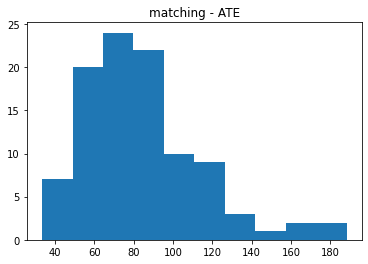

95.0 confidence interval 37.7 and 165.5


In [ ]:
# # import numpy
# # from pandas import read_csv
# # from sklearn.utils import resample
# # from sklearn.tree import DecisionTreeClassifier
# # from sklearn.metrics import accuracy_score
# # from matplotlib import pyplot

# # load dataset
# values = df.values
# # configure bootstrap
# n_iterations = 100
# n_size = 5000
# # run bootstrap
# stats = list()
# for i in range(n_iterations):
#   sample = df.sample(n=n_size)
#   X, y, X_treated, y_treated, X_control, y_control, T_ = get_data(sample, T)
#   knn = KNeighborsClassifier(1, metric="hamming")
#   knn.fit(X_control, y_control)
#   pred = knn.predict(X_treated)

#   knn2 =  KNeighborsClassifier(1, metric="hamming")
#   knn2.fit(X_treated, y_treated)
#   pred2 = knn2.predict(X_control)

#   ITE1 = y_treated - pred
#   ITE2 = pred2 - y_control
#   ITE = ITE1.append(ITE2)

#   knn_ATE = round(np.mean(ITE), 4)
#   stats.append(knn_ATE)
# plot scores

pyplot.title("matching - ATE")
pyplot.hist(stats, bins=10)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(stats, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(stats, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

In [ ]:
!git clone https://github.com/uber/causalml.git

Cloning into 'causalml'...
remote: Enumerating objects: 3333, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 3333 (delta 116), reused 170 (delta 108), pack-reused 3128
Receiving objects: 100% (3333/3333), 41.09 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (2060/2060), done.


In [ ]:
%cd causalml
!pip install -r requirements.txt
!pip install causalml

/content/causalml
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.0 MB/s 
     |████████████████████████████████| 569 kB 11.2 MB/s 
     |████████████████████████████████| 1.8 MB 43.0 MB/s 
     |████████████████████████████████| 718 kB 63.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 115 kB 49.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 406 kB 5.1 MB/s 
  Created wheel for causalml: filename=causalml-0.12.3-cp37-cp37m-linux_x86_64.whl size=1053939 sha256=653b3dc03825944e6d416534a5a1f6274f224de3fd3d79d500bf10243882cc2a
  Stored in directory: /root/.cache/pip/wheels/d7/5e/47/4e965cf8e87c6c10cd7361d910acccd08a1de459f25d55fd23
Successfully built causalml


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
# from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline
from causalml.inference.meta import LRSRegressor
import causalml


In [ ]:
treatment = df[T]
X = df.drop(["treatment", "effect"], axis=1)
y = treatment
from causalml.propensity import *
pm = GradientBoostedPropensityModel()
ps = pm.fit_predict(X=X, y=y)
e = ps

In [ ]:
# X Learner with propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(learner=XGBRegressor())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=df["effect"], p=ps)
print('Using the BaseXRegressor class and using XGB:')
print(ate_x)

[18:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using the BaseXRegressor class and using XGB:
(array([95.05350067]), array([65.07256478]), array([125.03443657]))


In [ ]:
# Ready-to-use T-Learner using XGB
learner_t = XGBTRegressor()
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=df["effect"])
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

[18:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using the ready-to-use XGBTRegressor class
(array([95.37461354]), array([65.01309416]), array([125.73613292]))


In [ ]:
e

array([0.10331599, 0.08000463, 0.05354141, ..., 0.10939282, 0.0883259 ,
       0.05958479], dtype=float32)

In [ ]:
# R Learner with propensity score input
# Calling the Base Learner class and feeding in XGB
learner_r = BaseRRegressor(learner=XGBRegressor())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y, p=e)
print('Using the BaseRRegressor class and using XGB:')
print(ate_r)

[21:58:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Using the BaseRRegressor class and using XGB:
(array([1.00723894]), array([1.00723864]), array([1.00723924]))


In [ ]:
# Garbage Collector - use it like gc.collect()
import gc
import tensorflow as tf


# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()